In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization'

In [3]:
# Import the orders data
climate = pd.read_csv(os.path.join(path, 'Data Sets', 'Weather_scaled.csv'))
climate

,DATE,MONTH,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,TOURS_temp_min,TOURS_temp_max,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.902918,-0.528623,-0.845652,...,0.085361,-0.495396,0.761754,-1.299744,-0.806427,-0.088407,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.810126,-0.582946,-0.462450,...,-0.056680,-0.521727,1.183580,-1.262455,-1.042055,0.503361,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-1.065304,-0.257010,-0.186545,...,0.298424,-0.574390,1.183580,-0.432779,-1.136306,-0.396127,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.114186,-0.555784,-0.385810,...,0.458220,-0.442733,0.480538,0.387574,-1.183432,0.669056,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,0.187388,-1.003946,-1.075573,...,0.600262,-0.521727,-0.363113,1.729970,-0.794645,-0.490810,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-0.02793,0.284075,1.037367,-0.005632,-0.004619,0.720943,0.747959,0.779123,...,1.221694,1.281970,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,-0.02793,0.103401,0.976231,-0.005632,-0.004619,0.187388,0.856604,1.223637,...,1.630063,1.084485,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.02793,0.013064,0.716402,-0.005632,-0.004619,0.349774,0.856604,1.039701,...,1.665574,1.123982,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.02793,0.374412,0.487141,-0.005632,-0.004619,0.280180,0.680055,0.809780,...,0.902100,0.452533,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530


In [4]:
# Display the list of columns
climate_columns_list = climate.columns.tolist()
print(climate_columns_list)

['DATE', 'MONTH', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'GDANSK_humidity', 'GDANSK_pre

In [5]:
# Import the  data answer
ans = pd.read_csv(os.path.join(path, 'Supervised', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
ans

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Display the list of columns
ans_columns_list = ans.columns.tolist()
print(ans_columns_list)

['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [7]:
# Drop the 'DATE' column from the dataframe
ans = ans.drop(columns=['DATE'])

# Display the dataframe to check if the column is dropped
ans

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Reduce to just the mean temperatures
df = climate[['BASEL_temp_mean', 
              'BELGRADE_temp_mean', 
              'BUDAPEST_temp_mean', 
              'DEBILT_temp_mean', 
              'DUSSELDORF_temp_mean', 
              'HEATHROW_temp_mean', 
              'KASSEL_temp_mean', 
              'LJUBLJANA_temp_mean', 
              'MAASTRICHT_temp_mean', 
              'MADRID_temp_mean', 
              'MUNCHENB_temp_mean', 
              'OSLO_temp_mean', 
              'SONNBLICK_temp_mean', 
              'STOCKHOLM_temp_mean', 
              'VALENTIA_temp_mean']].copy()

In [9]:
df

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


In [10]:
X = df
y = ans

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running a Decision Tree Model


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_tree = tree_model.predict(X_test)

# Calculate accuracy for training and testing data
train_acc_tree = tree_model.score(X_train, y_train)
test_acc_tree = tree_model.score(X_test, y_test)

In [12]:
# Display accuracy results
print(f'Training Accuracy: {train_acc_tree}')
print(f'Testing Accuracy: {test_acc_tree}')

Training Accuracy: 1.0
Testing Accuracy: 0.4106753812636166


In [13]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1099
           1       0.69      0.68      0.68      1561
           2       0.69      0.67      0.68      1461
           3       0.55      0.55      0.55       878
           4       0.53      0.53      0.53       975
           5       0.51      0.53      0.52       935
           6       0.55      0.51      0.53       743
           7       0.64      0.64      0.64      1229
           8       0.58      0.57      0.57       933
           9       0.81      0.79      0.80      2033
          10       0.60      0.56      0.58       952
          11       0.54      0.59      0.57       675
          12       0.00      0.00      0.00         0
          13       0.61      0.58      0.60       788
          14       0.23      0.20      0.21       228

   micro avg       0.62      0.62      0.62     14490
   macro avg       0.54      0.53      0.54     14490
wei

C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luis\anaconda3\Lib\site-packages\sklearn\metrics\_classif

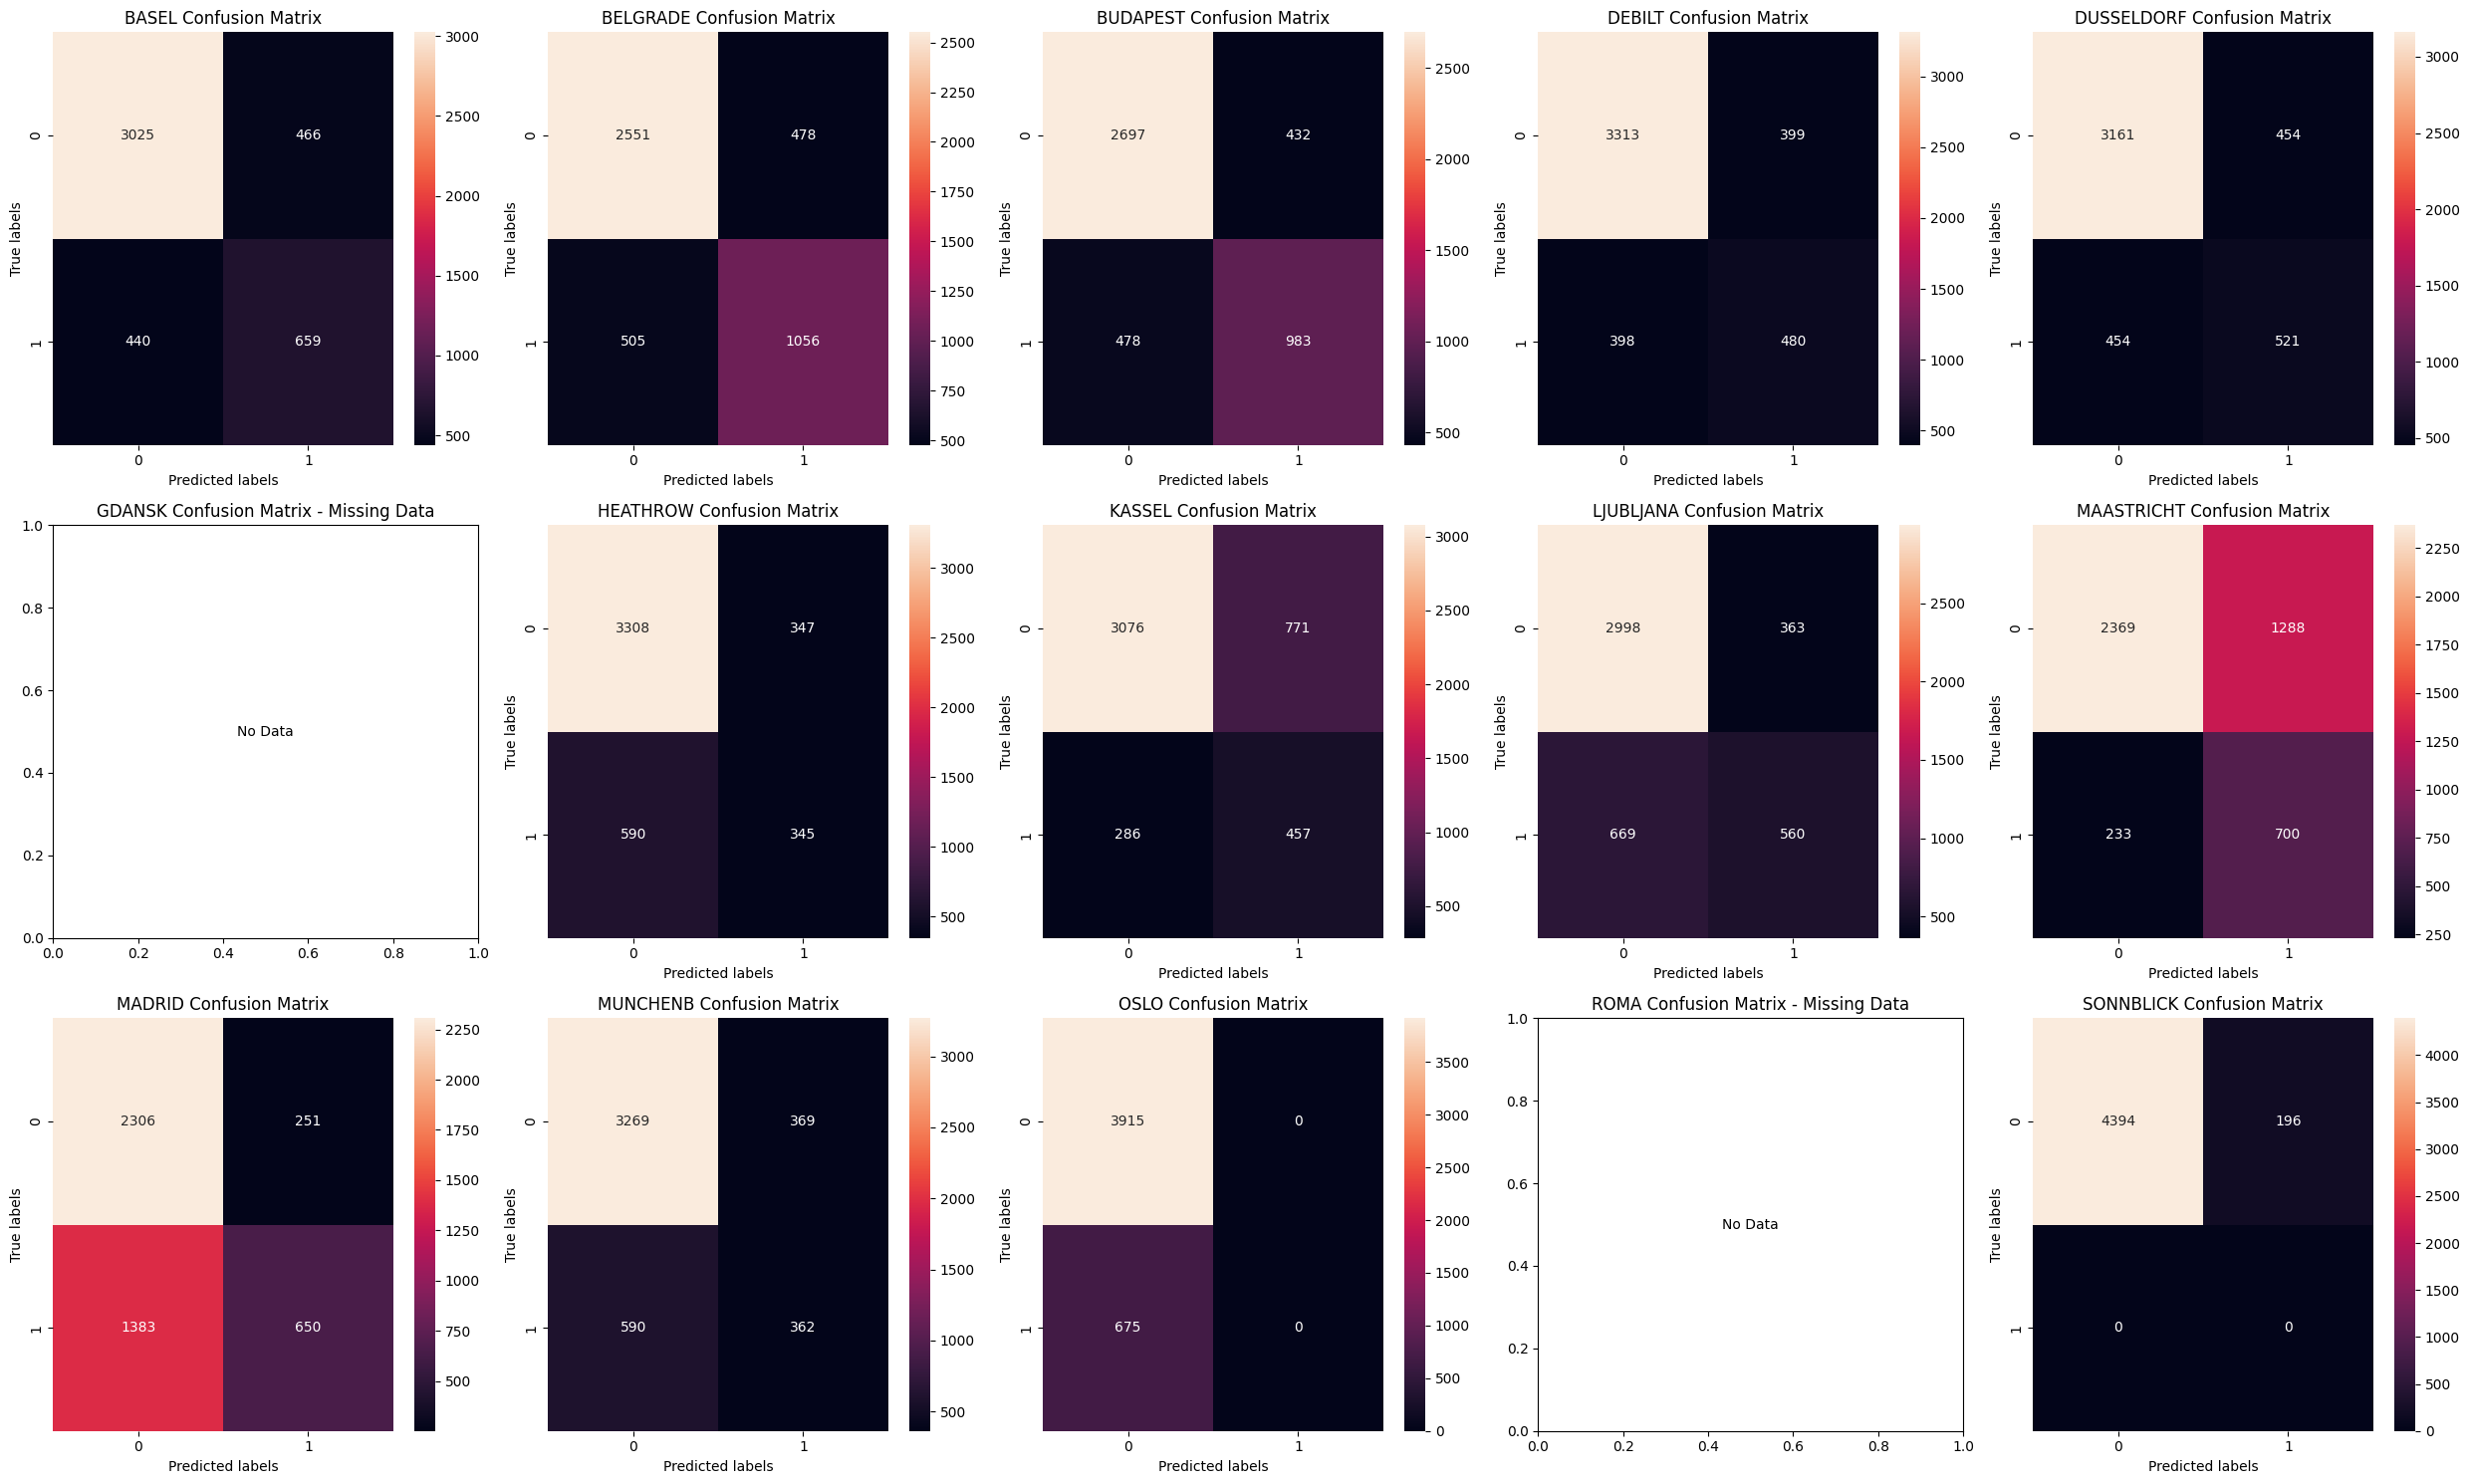

In [14]:
# Generate confusion matrix visualizations
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            # Check if the station is available in y_test
            if (name + key) in y_test.columns:
                cm = confusion_matrix(y_test[name + key], y_pred_tree[:, count])
                sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
                ax[i, j].set_xlabel('Predicted labels')
                ax[i, j].set_ylabel('True labels')
                ax[i, j].set_title(f"{name} Confusion Matrix")
            else:
                # Indicate missing data if the station is not in y_test
                ax[i, j].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center')
                ax[i, j].set_title(f"{name} Confusion Matrix - Missing Data")
            count += 1

plt.tight_layout()
plt.show()


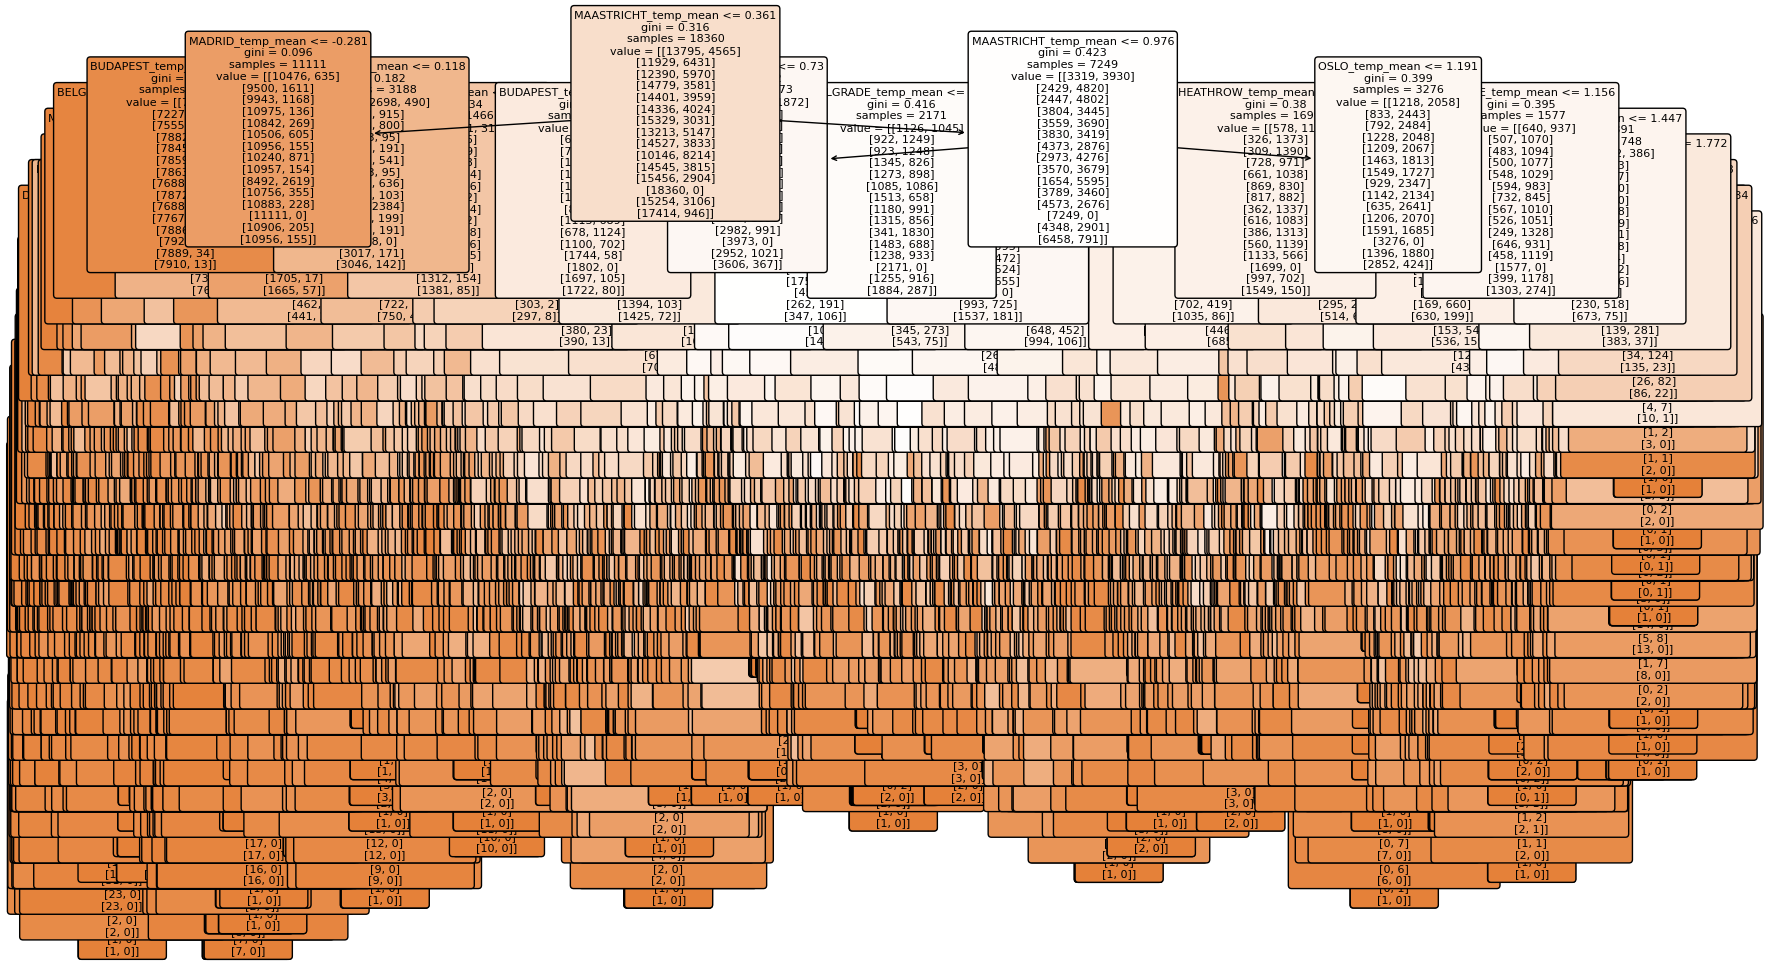

In [15]:
# Plot the decision tree
from sklearn import tree

# Display the structure of the tree (this may take time for a large dataset)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Unpleasant', 'Pleasant'], rounded=True, fontsize=8)
plt.show()